<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CTR-prediction" data-toc-modified-id="CTR-prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CTR-prediction</a></span><ul class="toc-item"><li><span><a href="#Problem-Formulation" data-toc-modified-id="Problem-Formulation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Formulation</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-construction:" data-toc-modified-id="Dataset-construction:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Dataset construction:</a></span></li><li><span><a href="#Format:" data-toc-modified-id="Format:-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Format:</a></span></li></ul></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Metrics</a></span></li></ul></li><li><span><a href="#Dataset-preprocessing" data-toc-modified-id="Dataset-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset preprocessing</a></span><ul class="toc-item"><li><span><a href="#ML-Pipelines-(Transformers,-Estimators)" data-toc-modified-id="ML-Pipelines-(Transformers,-Estimators)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://spark.apache.org/docs/latest/ml-pipeline.html#pipeline-components" target="_blank">ML Pipelines (Transformers, Estimators)</a></a></span><ul class="toc-item"><li><span><a href="#Prepare-stages-of-pipeline" data-toc-modified-id="Prepare-stages-of-pipeline-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Prepare stages of pipeline</a></span></li><li><span><a href="#Fit-and-save-pipeline" data-toc-modified-id="Fit-and-save-pipeline-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Fit and save pipeline</a></span></li><li><span><a href="#Load-fitted-pipeline" data-toc-modified-id="Load-fitted-pipeline-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Load fitted pipeline</a></span></li><li><span><a href="#Transform-dataset-using-pipeline" data-toc-modified-id="Transform-dataset-using-pipeline-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Transform dataset using pipeline</a></span></li><li><span><a href="#Make-dataset-split" data-toc-modified-id="Make-dataset-split-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Make dataset split</a></span></li></ul></li></ul></li><li><span><a href="#Classification" data-toc-modified-id="Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html" target="_blank">Classification</a></a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><a href="https://spark.apache.org/docs/latest/ml-classification-regression.html#logistic-regression" target="_blank">Logistic Regression</a></a></span><ul class="toc-item"><li><span><a href="#Define-and-Train-model" data-toc-modified-id="Define-and-Train-model-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Define and Train model</a></span></li></ul></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><a href="https://spark.apache.org/docs/2.1.0/mllib-evaluation-metrics.html" target="_blank">Evaluation</a></a></span><ul class="toc-item"><li><span><a href="#Binary-classification-metrics" data-toc-modified-id="Binary-classification-metrics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><a href="https://spark.apache.org/docs/2.1.0/mllib-evaluation-metrics.html#binary-classification" target="_blank">Binary classification metrics</a></a></span></li><li><span><a href="#Make-submission" data-toc-modified-id="Make-submission-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Make submission</a></span></li></ul></li></ul></div>

# CTR-prediction

## Problem Formulation

$\newcommand{\vecw}{{\bf w}}$
$\newcommand{\vecx}{{\bf x}}$

* Dataset: $X^N = \{ z_i \}^N_{i=1}$, где $z_i = (\vecx_i, y_i) \sim P(z), y_i \in \{0,1\}$
* Prediction: $$ \hat{y}_i = f_{\vecw}(\vecx_i) =  \mathbb{P} \left\{ y = 1 \mid \vecx_i \right\} $$
* Loss function (Binary Cross-Entropy): $$ \min\limits_{\vecw} \quad \frac{\lambda}{2}\| \vecw \|^2_2 - \frac{1}{N} \sum\limits_{i=1}^{N} y_i \log \hat{y}_i + (1-y_i) \log(1-\hat{y}_i) $$

## Dataset
$ $
<details>
  <summary>Click here to see the details</summary>

For more details see `/data/criteo/readme.txt`

### Dataset construction:


>There are 13 features taking **integer** values and 26
**categorical** features. The values of the categorical features have been hashed
onto 32 bits for anonymization purposes. 
Some features may have missing values.

> The rows are chronologically ordered by `id` column.

> The test set corresponds to events on the day following the training period. 
The first column (`label`) has been removed.


### Format:

> The columns are comma separeted with the following schema:
`<label>,<integer feature 1>, ... <integer feature 13>,<categorical feature 1>, ... <categorical feature 26>,<id>`

> When a value is missing, the field is "". There is no `label` field in the test set.

</details>
    
## Metrics

The evaluation metrics for this task are
* ROC AUC
* LogLoss
* [Normalized Entropy](https://quinonero.net/Publications/predicting-clicks-facebook.pdf)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import os
import shutil
import sys
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pyspark
import pyspark.sql.functions as F
from pyspark.conf import SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql import Row


spark = SparkSession \
    .builder \
    .master('local[*]') \
    .appName("spark_sql_examples") \
    .config("spark.executor.memory", "10g") \
    .getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [2]:
DATA_PATH = '/workspace/data/criteo'

TRAIN_PATH = os.path.join(DATA_PATH, 'train.csv')
TEST_PATH = os.path.join(DATA_PATH, 'test.csv')
SUBMISSION_PATH = os.path.join(DATA_PATH, 'submission.csv')

Lets begin our introduction to Spark [MLlib](https://spark.apache.org/docs/latest/ml-guide.html)

---
# Dataset preprocessing

Before we can train any prediction model on our dataset we need to conver each row into real-valued features vector ($\vecx \in \mathbb{R}^n$).

Spark MLlib provides easy to use tools for preprocessing raw features and turning them into suitable format.

In [3]:
df = sqlContext.read.format("com.databricks.spark.csv") \
    .option("delimiter", ",") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('file:///' + TRAIN_PATH)

In [4]:
df = df.sample(False, 0.5)

In [5]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: integer (nullable = true)
 |-- _c7: integer (nullable = true)
 |-- _c8: integer (nullable = true)
 |-- _c9: integer (nullable = true)
 |-- _c10: integer (nullable = true)
 |-- _c11: integer (nullable = true)
 |-- _c12: integer (nullable = true)
 |-- _c13: integer (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: string (nullable = true)
 |-- _c27: string (

Keeping only first two categorical features for simplicity

In [6]:
num_columns = ['_c{}'.format(i) for i in range(1, 14)]
cat_columns = ['_c{}'.format(i) for i in range(14, 40)][:2]
len(num_columns), len(cat_columns)

(13, 2)

In [7]:
df = df.fillna(0, subset=num_columns)

## [ML Pipelines (Transformers, Estimators)](https://spark.apache.org/docs/latest/ml-pipeline.html#pipeline-components)


MLlib standardizes APIs for machine learning algorithms to make it easier to combine multiple algorithms into a single pipeline, or workflow.

* `Transformer`: A Transformer is an algorithm which can transform one DataFrame into another DataFrame. E.g., an ML model is a Transformer which transforms a DataFrame with features into a DataFrame with predictions.


* `Estimator`: An Estimator is an algorithm which can be fit on a DataFrame to produce a Transformer. E.g., a learning algorithm is an Estimator which trains on a DataFrame and produces a model.


* `Pipeline`: A Pipeline chains multiple Transformers and Estimators together to specify an ML workflow.

---
Basically speaking `transformer` is an instance of class that implements `transform` method, and both `estimator` and `pipeline` implements `transform` and `fit` methods.

---

### Prepare stages of pipeline

We might benefit from using `StringIndexer, OneHotEncoderEstimator, VectorAssembler` (see [doc](https://spark.apache.org/docs/latest/ml-features) for details) 

In [8]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler

In [9]:
indexer_columns = [column + "_index" for column in cat_columns]
indexers = [StringIndexer(inputCol=column, outputCol=column + "_index", handleInvalid='keep') for column in cat_columns]
# from: https://stackoverflow.com/a/36944716

In [10]:
one_hot_columns = [column + "_vec" for column in cat_columns]
encoder = OneHotEncoderEstimator(inputCols=indexer_columns,
                                 outputCols=one_hot_columns)

In [11]:
assembler = VectorAssembler(
    inputCols=num_columns + one_hot_columns,
    outputCol="features")

In [12]:
stages = [*indexers, encoder, assembler]

In [13]:
stages

[StringIndexer_c42773d6ff43,
 StringIndexer_25efb5034eb3,
 OneHotEncoderEstimator_99443336b5be,
 VectorAssembler_32b1969e093c]

In [14]:
pipeline = Pipeline(stages=stages)

### Fit and save pipeline

In [15]:
fitted_pipeline = pipeline.fit(df)

In [16]:
pipeline_path = "pipeline_fitted"

In [17]:
if os.path.isdir(pipeline_path):
    shutil.rmtree(pipeline_path)

In [18]:
fitted_pipeline.save(pipeline_path)

### Load fitted pipeline

In [19]:
from pyspark.ml import PipelineModel

loaded_pipeline = PipelineModel.load(pipeline_path)

### Transform dataset using pipeline

In [20]:
df_transformed = loaded_pipeline.transform(df)

In [21]:
df_transformed.limit(1).toPandas()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,...,_c36,_c37,_c38,_c39,id,_c14_index,_c15_index,_c14_vec,_c15_vec,features
0,0,0,5,30,4,0,0,0,5,4,...,be7c41b4,335a6a1e,001f3601,8d8eb391,108,1.0,1.0,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 5.0, 30.0, 4.0, 0.0, 0.0, 0.0, 5.0, 4.0,..."


Проверим, что загруженный `pipeline` работает точно также, как и оригинальный

In [22]:
df_transformed_original = pipeline.fit(df).transform(df)

In [23]:
assert df_transformed_original \
    .exceptAll(df_transformed) \
    .union(df_transformed \
                .exceptAll(df_transformed_original)) \
    .count() == 0, "DF aren't equal"

# from: https://stackoverflow.com/a/47613276/6696410

Наконец извелечем признаки

In [24]:
df = df_transformed.select('features', '_c0', 'id').withColumnRenamed('_c0', 'label')

In [25]:
df.limit(2).toPandas()

,features,label,id
0,"(0.0, 5.0, 30.0, 4.0, 0.0, 0.0, 0.0, 5.0, 4.0,...",0,108
1,"(1.0, 0.0, 31.0, 9.0, 226.0, 22.0, 32.0, 13.0,...",1,121


### Make dataset split

Spark provides [randomSplit](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.randomSplit) method.

It is not the best choice in our task since we have chronological order in data.

We need to implement our own split function which will split the data in parts with respect to chronological order.

In [26]:
from pyspark.sql.window import Window

In [27]:
def split_by_col(df, split_col, parts_fractions):
    """
    df - DataFrame
    split_col - total order column
    parts_fractions - fractions of resulting parts
    """
    # from homework № 2
    df_with_rank = df \
      .withColumn('rank', F.percent_rank().over(Window.orderBy(split_col)))
    
    parts = []    
    cumsum = 0
    
    for part_ratio in parts_fractions:
        part = df_with_rank \
                    .filter((cumsum <= df_with_rank['rank'])  \
                              & (df_with_rank['rank'] < cumsum + part_ratio)) \
                    .drop('rank')        
        parts.append(part)
        
        cumsum += part_ratio
    
    return parts

In [28]:
train_df, val_df, test_df = split_by_col(df, 'id', [0.8, 0.1, 0.1])

In [29]:
N = df.count()

In [30]:
train_df.count() / N, val_df.count() / N, test_df.count() / N

(0.7999998909005018, 0.1000000545497491, 0.09999950905225811)

---
# [Classification](https://spark.apache.org/docs/latest/ml-classification-regression.html)

## [Logistic Regression](https://spark.apache.org/docs/latest/ml-classification-regression.html#logistic-regression)

### Define and Train model

In [31]:
from pyspark.ml.classification import LogisticRegression

In [32]:
lr = LogisticRegression(maxIter=50, regParam=0.01, elasticNetParam=0.01)

In [33]:
%%time
lr_model = lr.fit(train_df)

CPU times: user 15.7 ms, sys: 7.92 ms, total: 23.6 ms
Wall time: 43.1 s


In [34]:
lr_model.transform(val_df).limit(2).toPandas()

,features,label,id,rawPrediction,probability,prediction
0,"(0.0, 0.0, 3.0, 4.0, 5996.0, 23.0, 2.0, 4.0, 7...",1,455266587765,"[1.2117282918141636, -1.2117282918141636]","[0.7706046075038884, 0.22939539249611157]",0.0
1,"(0.0, 6.0, 15.0, 3.0, 453310.0, 0.0, 0.0, 7.0,...",0,455266587771,"[2.657858715482563, -2.657858715482563]","[0.9344937092682726, 0.06550629073172734]",0.0


In [35]:
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lr_model.summary

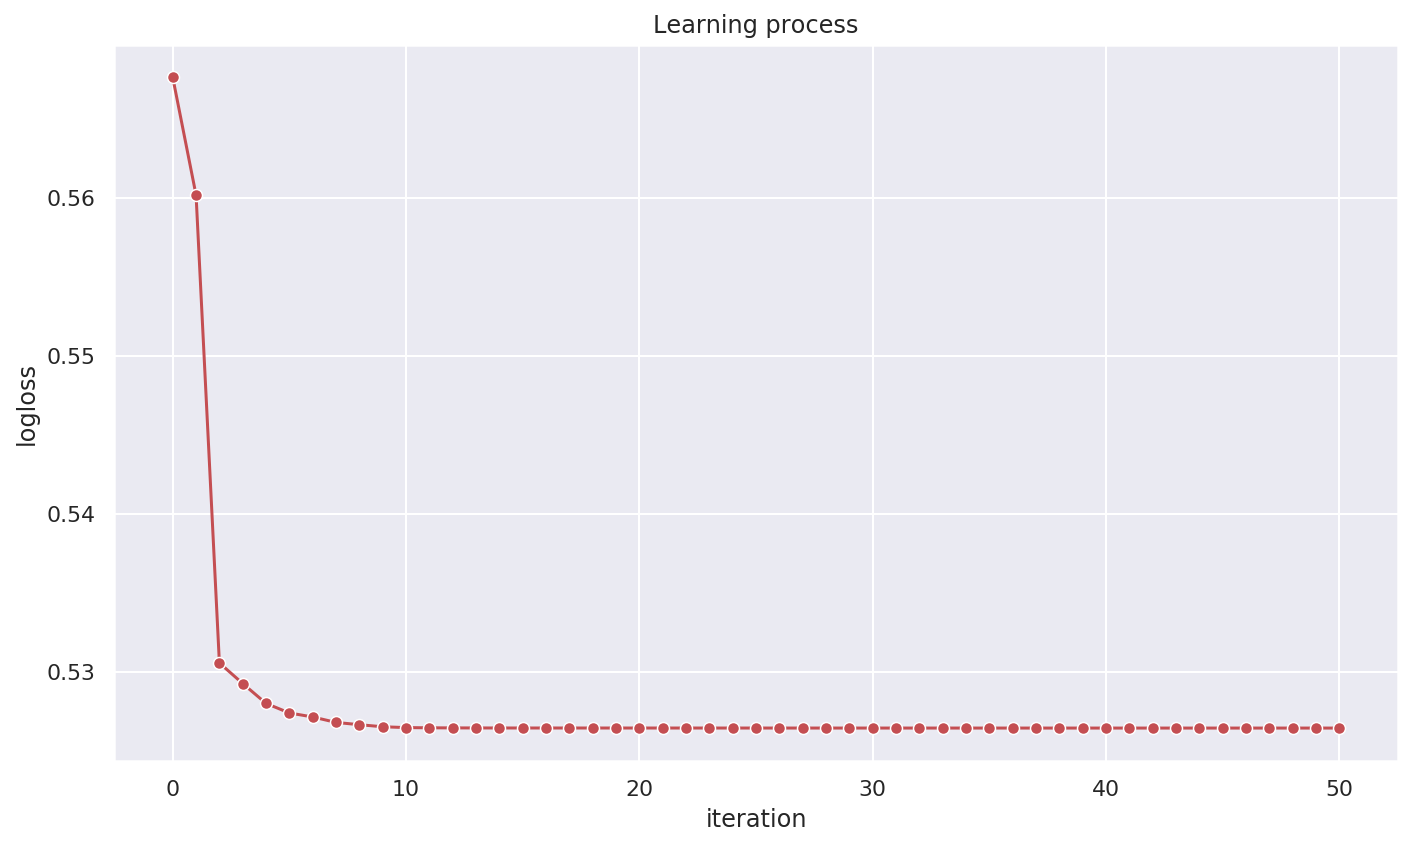

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
# Obtain the objective per iteration
objective_history = trainingSummary.objectiveHistory
sns.lineplot(x=np.arange(len(objective_history)), y=objective_history, color="r", marker="o")
plt.title("Learning process")
plt.xlabel("iteration")
plt.ylabel("logloss")
plt.tight_layout()
plt.show()

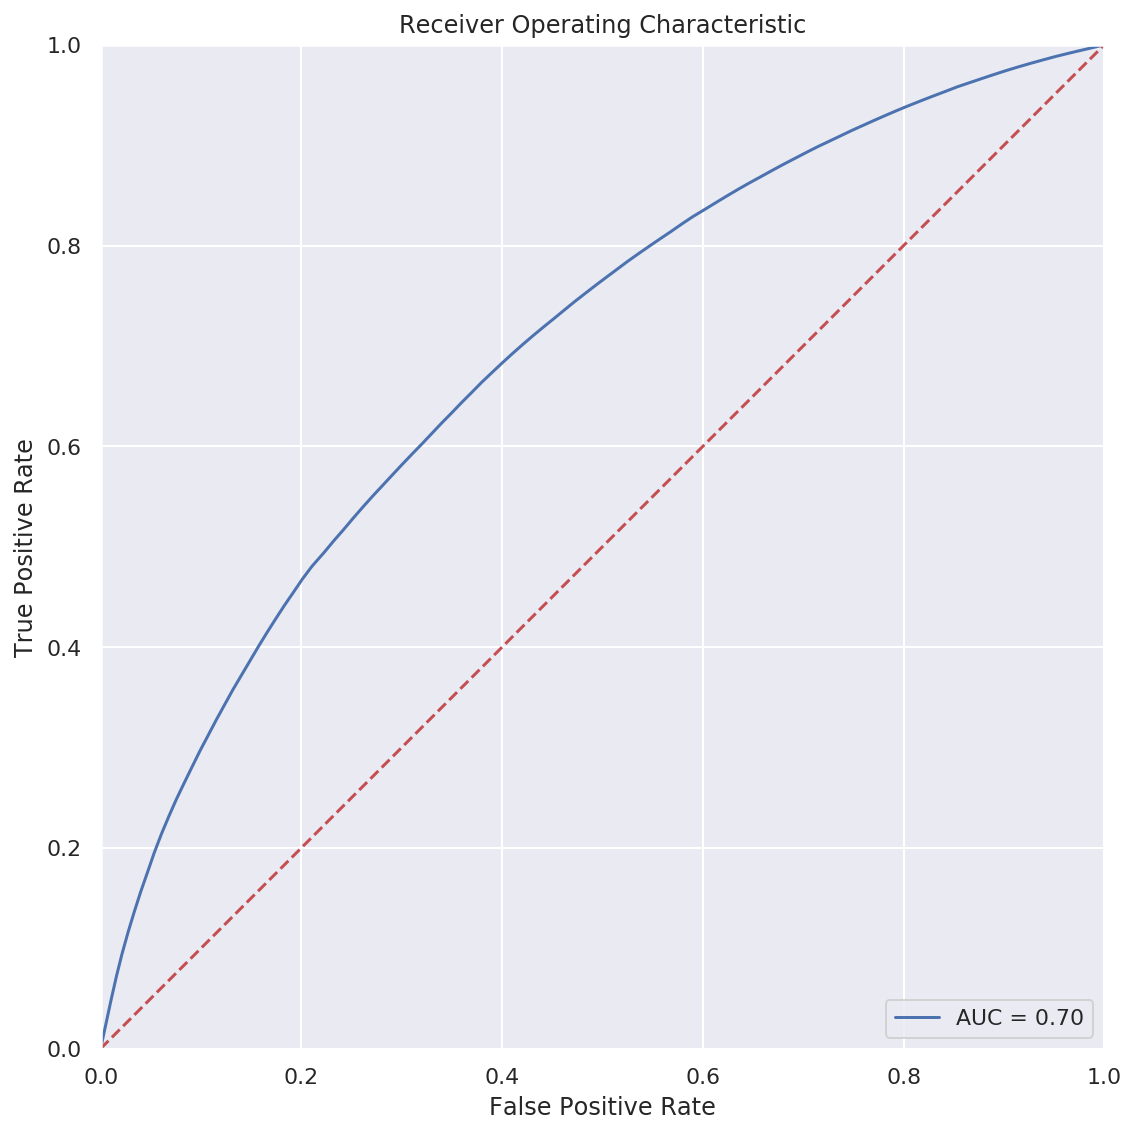

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
# Obtain the receiver-operating characteristic and areaUnderROC.
fpr = trainingSummary.roc.select('FPR').rdd.flatMap(lambda x: x).collect()
tpr = trainingSummary.roc.select('TPR').rdd.flatMap(lambda x: x).collect()
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % trainingSummary.areaUnderROC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

In [38]:
# the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
bestThreshold

0.24241442568426733

---
# [Evaluation](https://spark.apache.org/docs/2.1.0/mllib-evaluation-metrics.html)

## [Binary classification metrics](https://spark.apache.org/docs/2.1.0/mllib-evaluation-metrics.html#binary-classification)

* ROC AUC
* LogLoss
* Normalized Entropy

In [39]:
from pyspark.sql.types import *
from pyspark.sql import types as T
from pyspark.mllib.evaluation import BinaryClassificationMetrics

In [40]:
@F.udf(T.DoubleType())
def extract_prob(v):
    return float(v[1])

In [41]:
def predict_and_return_proba(model, df):
    # https://stackoverflow.com/a/56258261 
    # getItem is not working :(
    # https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.Column.getItem
    # https://stackoverflow.com/a/44505571/6696410
    predicted = model.transform(df)
    return predicted \
            .withColumn('proba', extract_prob(F.col('probability')))

In [42]:
predict_and_return_proba(model=lr_model, df=val_df).limit(1).toPandas()

,features,label,id,rawPrediction,probability,prediction,proba
0,"(0.0, 0.0, 3.0, 4.0, 5996.0, 23.0, 2.0, 4.0, 7...",1,455266587765,"[1.2117282918141636, -1.2117282918141636]","[0.7706046075038884, 0.22939539249611157]",0.0,0.229395


In [43]:
def rocauc(model, df):
    prediction = predict_and_return_proba(model, df)
    
    predictionAndLabels = prediction.rdd.map(lambda lp: (lp.proba, float(lp.label)))
    
    return BinaryClassificationMetrics(predictionAndLabels).areaUnderROC


def logloss(model, df):
    prediction = predict_and_return_proba(model, df)
    
    logloss =  prediction.withColumn('logloss', \
            -F.col('label') * F.log(F.col('proba')) - (F.lit(1) - F.col('label')) * F.log(F.lit(1) - F.col('proba')))
    
    return logloss.select('logloss').groupBy().avg("logloss").first()['avg(logloss)']


def ne(model, df):
    model_logloss = logloss(model, df)
    
    constant_prediction = df.select('label').groupBy().avg("label").first()['avg(label)']
    constant_log_loss = - constant_prediction * np.log(constant_prediction) - (1 - constant_prediction) * np.log(1 - constant_prediction)
    
    return model_logloss / constant_log_loss

In [44]:
def calculate_metrics(model, df):
    # why not python 3.6 and f-string :(
    print("AUC: {}, logloss: {}, ne: {}".format(rocauc(model, df), logloss(model, df), ne(model, df)))

In [45]:
calculate_metrics(lr_model, val_df)

AUC: 0.7013092253726475, logloss: 0.5295620660479762, ne: 0.9194001428980791


In [46]:
calculate_metrics(lr_model, test_df)

AUC: 0.7000757626109715, logloss: 0.5313754605113606, ne: 0.9200839359216927


## Make submission

Join the [competition](https://www.kaggle.com/c/mlbd-20-ctr-prediction-1) and make a submission

In [47]:
submission_df = sqlContext.read.format("com.databricks.spark.csv") \
    .option("delimiter", ",") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('file:///' + TEST_PATH)

In [48]:
submission_df = submission_df.fillna(0, subset=num_columns)

In [49]:
submission_df_transformed = loaded_pipeline.transform(submission_df)

In [50]:
submission_pred = predict_and_return_proba(lr_model, submission_df_transformed)

In [51]:
submission_pred.select('id', 'proba').toPandas().to_csv(SUBMISSION_PATH, index=False)

In [56]:
submission_message = '"Random half of train, moreover 0.8 of it, log reg with 50 iterations. Local AUC: ~70"'

In [58]:
! kaggle competitions submit mlbd-20-ctr-prediction-1 -f $SUBMISSION_PATH -m $submission_message

100%|██████████████████████████████████████| 28.5M/28.5M [00:11<00:00, 2.71MB/s]
Successfully submitted to CTR prediction

In [60]:
! kaggle competitions submissions mlbd-20-ctr-prediction-1

fileName        date                 description                                                                           status    publicScore  privateScore  
--------------  -------------------  ------------------------------------------------------------------------------------  --------  -----------  ------------  
submission.csv  2020-02-27 01:26:19  Random half of train, moreover 0.8 of it, log reg with 50 iterations. Local AUC: ~70  complete  0.69420      None          
